In [4]:
import sys
from pathlib import Path

# Detect project root automatically relative to notebook location
project_root = Path.cwd().resolve().parents[0]  # assumes notebook in /notebooks/
if (project_root / "src").exists() and str(project_root) not in sys.path:
    sys.path.append(str(project_root))

from src.tngmw.config import RAW, PLOTS, SIMULATION, SNAPNUM, SUBID

In [153]:
import yt
import trident
from src.tngmw.config import RAW, PLOTS

# Load the dataset
ds = yt.load(RAW / "subhalo_432106_cutout_full.hdf5")
# ds = yt.load(RAW / "subhalo_509091_cutout_full.hdf5")
print("Fields available after load:", ds.field_list)

# Add ion fields
ions = ["H I", "C IV", "O VI", "Na I", "Ca II", "Na II"]
trident.add_ion_fields(ds, ions=ions)

# Print fields again to verify what got added
print("Fields after ion addition:", ds.field_list)
print("Derived Fields:", ds.derived_field_list)



yt : [INFO     ] 2025-11-09 12:15:55,618 Calculating time from 1.000e+00 to be 4.356e+17 seconds
yt : [INFO     ] 2025-11-09 12:15:55,636 Parameters: current_time              = 4.355810528213311e+17 s
yt : [INFO     ] 2025-11-09 12:15:55,637 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-11-09 12:15:55,637 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-11-09 12:15:55,638 Parameters: domain_right_edge         = [35000. 35000. 35000.]
yt : [INFO     ] 2025-11-09 12:15:55,638 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-11-09 12:15:55,639 Parameters: current_redshift          = 2.220446049250313e-16
yt : [INFO     ] 2025-11-09 12:15:55,639 Parameters: omega_lambda              = 0.6911
yt : [INFO     ] 2025-11-09 12:15:55,639 Parameters: omega_matter              = 0.3089
yt : [INFO     ] 2025-11-09 12:15:55,639 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-11-09 12:15:55,640 Parameters: hubble_con

Fields available after load: [('PartType0', 'CenterOfMass'), ('PartType0', 'Coordinates'), ('PartType0', 'Density'), ('PartType0', 'ElectronAbundance'), ('PartType0', 'EnergyDissipation'), ('PartType0', 'GFM_AGNRadiation'), ('PartType0', 'GFM_CoolingRate'), ('PartType0', 'GFM_Metallicity'), ('PartType0', 'GFM_MetalsTagged'), ('PartType0', 'GFM_Metals_00'), ('PartType0', 'GFM_Metals_01'), ('PartType0', 'GFM_Metals_02'), ('PartType0', 'GFM_Metals_03'), ('PartType0', 'GFM_Metals_04'), ('PartType0', 'GFM_Metals_05'), ('PartType0', 'GFM_Metals_06'), ('PartType0', 'GFM_Metals_07'), ('PartType0', 'GFM_Metals_08'), ('PartType0', 'GFM_Metals_09'), ('PartType0', 'GFM_WindDMVelDisp'), ('PartType0', 'GFM_WindHostHaloMass'), ('PartType0', 'InternalEnergy'), ('PartType0', 'Machnumber'), ('PartType0', 'MagneticField'), ('PartType0', 'MagneticFieldDivergence'), ('PartType0', 'Masses'), ('PartType0', 'NeutralHydrogenAbundance'), ('PartType0', 'ParticleIDs'), ('PartType0', 'Potential'), ('PartType0', 'S

In [157]:
import requests
from src.tngmw.config import SIMULATION, SNAPNUM, SUBID, TNG_API_KEY

# SUBID = 509091  # example subhalo ID
url = f"https://www.tng-project.org/api/{SIMULATION}/snapshots/{SNAPNUM}/subhalos/{SUBID}/"
resp = requests.get(url, headers={"api-key": TNG_API_KEY})
resp.raise_for_status()
detail = resp.json()

pos_x = detail["pos_x"]
pos_y = detail["pos_y"]
pos_z = detail["pos_z"]

print("Subhalo position (ckpc/h):", pos_x, pos_y, pos_z)

Subhalo position (ckpc/h): 7892.83 8587.43 2216.5


In [158]:
def make_ion_proj(ds, center, width_kpc=600):
    ions = ["H I", "C IV", "O VI", "Na I", "Ca II", "Na II"]
    trident.add_ion_fields(ds, ions=ions)
    fields = {
        "H I": ("gas", "H_p0_number_density"),
        "C IV": ("gas", "C_p3_number_density"),
        "O VI": ("gas", "O_p5_number_density"),
        "Na I": ("gas", "Na_p0_number_density"),
        "Ca II": ("gas", "Ca_p1_number_density"),
        "Na II": ("gas", "Na_p1_number_density"),
        
    }

    for name, fld in fields.items():
        if fld in ds.derived_field_list:
            p = yt.ProjectionPlot(ds, "z", fld, center=center, width=(width_kpc, "kpc"))
            p.set_cmap(fld, "viridis")
            p.save(PLOTS / f"{SUBID}_{name.replace(' ', '_')}.png")

In [159]:
make_ion_proj(ds, center=[pos_x, pos_y, pos_z], width_kpc=300)

yt : [WARNING  ] 2025-11-09 12:16:35,968 Field ('gas', 'H_p0_ion_fraction') already exists. Not clobbering.
yt : [WARNING  ] 2025-11-09 12:16:35,969 Field ('gas', 'H_p0_number_density') already exists. Not clobbering.
yt : [WARNING  ] 2025-11-09 12:16:35,969 Field ('gas', 'H_p0_density') already exists. Not clobbering.
yt : [WARNING  ] 2025-11-09 12:16:35,969 Field ('gas', 'H_p0_mass') already exists. Not clobbering.
yt : [WARNING  ] 2025-11-09 12:16:35,969 Field ('gas', 'C_p3_ion_fraction') already exists. Not clobbering.
yt : [WARNING  ] 2025-11-09 12:16:35,969 Field ('gas', 'C_p3_number_density') already exists. Not clobbering.
yt : [WARNING  ] 2025-11-09 12:16:35,970 Field ('gas', 'C_p3_density') already exists. Not clobbering.
yt : [WARNING  ] 2025-11-09 12:16:35,970 Field ('gas', 'C_p3_mass') already exists. Not clobbering.
yt : [WARNING  ] 2025-11-09 12:16:35,970 Field ('gas', 'O_p5_ion_fraction') already exists. Not clobbering.
yt : [WARNING  ] 2025-11-09 12:16:35,970 Field ('g

In [88]:
import yt
from src.tngmw.config import RAW, PLOTS

ds = yt.load(RAW / "subhalo_432106_cutout_full.hdf5")
center = [pos_x, pos_y, pos_z]          # from API
width  = (50, "kpc")

axis  = "z"
vfield = ("gas", f"velocity_{axis}")    # ('gas','velocity_z')

p = yt.ProjectionPlot(
    ds, axis, vfield,
    center=center, width=width,
    weight_field=("gas","density"), # density-weighted mean LOS velocity
    buff_size=(1024,1024),
)
p.set_unit(vfield, "km/s")
p.set_cmap(vfield, "RdBu")            # diverging for ± velocities
# p.set_zlim(vfield, -60, 150)           # adjust to your system
out = PLOTS / f"los_velocity_{axis}_{int(width[0])}kpc.png"
p.save(out)
print(out)

yt : [INFO     ] 2025-11-09 10:27:26,592 Calculating time from 1.000e+00 to be 4.356e+17 seconds
yt : [INFO     ] 2025-11-09 10:27:26,611 Parameters: current_time              = 4.355810528213311e+17 s
yt : [INFO     ] 2025-11-09 10:27:26,611 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-11-09 10:27:26,612 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-11-09 10:27:26,612 Parameters: domain_right_edge         = [35000. 35000. 35000.]
yt : [INFO     ] 2025-11-09 10:27:26,612 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-11-09 10:27:26,613 Parameters: current_redshift          = 2.220446049250313e-16
yt : [INFO     ] 2025-11-09 10:27:26,613 Parameters: omega_lambda              = 0.6911
yt : [INFO     ] 2025-11-09 10:27:26,613 Parameters: omega_matter              = 0.3089
yt : [INFO     ] 2025-11-09 10:27:26,613 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-11-09 10:27:26,613 Parameters: hubble_con

/Users/wavefunction/ASU Dropbox/Tanmay Singh/TNG-MW/plots/los_velocity_z_50kpc.png


In [66]:
import numpy as np

def compute_f_value(Aki, wavelength_A, g_upper, g_lower):
    """
    Compute oscillator strength f_ik from Einstein Aki.
    Aki : Einstein coefficient [s⁻¹]
    wavelength_A : transition wavelength in Å
    g_upper : statistical weight of upper level = 2*J_upper + 1
    g_lower : statistical weight of lower level = 2*J_lower + 1
    Returns f_ik (dimensionless)
    """
    return 1.499e-16 * (wavelength_A**2) * (g_upper / g_lower) * Aki


# ------------------------
# Line data from NIST ASD
# ------------------------
lines = [
    # name, Aki [s⁻¹], λ [Å], J_lower, J_upper
    ("Na I D2", 6.16e7, 5889.95095, 0.5, 1.5),
    ("Na I D1", 6.14e7, 5895.92424, 0.5, 0.5),
    ("Ca II K", 1.47e8, 3933.663,   0.5, 1.5),
    ("Ca II H", 1.40e8, 3968.469,   0.5, 0.5),
]

# Compute f-values
for name, Aki, lam, Jl, Ju in lines:
    g_lower, g_upper = 2*Jl + 1, 2*Ju + 1
    f = compute_f_value(Aki, lam, g_upper, g_lower)
    print(f"{name:10s}:  f = {f:.4f}")

Na I D2   :  f = 0.6407
Na I D1   :  f = 0.3199
Ca II K   :  f = 0.6819
Ca II H   :  f = 0.3305


In [68]:
ldb = trident.LineDatabase('lines.txt')

In [70]:
ldb.add_line('Na', 'I', 5889.95095, 6.16e7,0.6407)
ldb.add_line('Na', 'I', 5895.92424, 6.14e7,0.3199)
ldb.add_line('Ca', 'II', 3933.663,   1.47e8,0.6346)
ldb.add_line('Ca', 'II', 3968.469,   1.40e8,0.3154)
print("Lines in database:", ldb.lines_all)

Lines in database: [Ly a, Ly b, Ly c, Ly d, Ly e, Ly 6, Ly 7, Ly 8, Ly 9, Ly 10, Ly 11, Ly 12, Ly 13, Ly 14, Ly 15, Ly 16, Ly 17, Ly 18, Ly 19, Ly 20, Ly 21, Ly 22, Ly 23, Ly 24, Ly 25, Ly 26, Ly 27, Ly 28, Ly 29, Ly 30, Ly 31, Ly 32, Ly 33, Ly 34, Ly 35, Ly 36, Ly 37, Ly 38, Ly 39, C I 1657, C I 1560, C I 1329, C I 1280, C I 1277, C I 1261, C I 1194, C I 1193, C I 1189, C I 1158, C II* 1336, C II 1335, C II* 1037, C II 1036, C II 904, C III 977, C IV 1551, C IV 1548, N I 1201, N I 1200, N I 1200, N I 1135, N I 1134, N I 1134, N I 965, N I 965, N I 964, N I 954, N I 954, N I 954, N I 953, N I 952, N I 952, N II 1084, N II 916, N III 990, N IV 765, N V 1243, N V 1239, O I* 1306, O I* 1305, O I 1302, O I 1039, O I 989, O I 989, O I 976, O I 951, O I 937, O I 930, O I 925, O I 922, O II 834, O II 833, O II 833, O III* 835, O III* 835, O III 833, O III* 703, O III 702, O IV* 790, O IV 788, O IV* 610, O IV 608, O IV* 555, O IV 554, O IV 553, O V 630, O VI 1038, O VI 1032, Ne V* 572, Ne V* 5

## Spectra Generation

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Na I D + Ca II H&K:
- Three rays at impact parameters 20/50/100 kpc (random PA, reproducible seed)
- Spectra with two zoomed 2×2 figures per ray:
    (1) wavelength space (±3 Å around line center)
    (2) velocity space (±500 km/s around systemic)
- Annotated projection maps (Na I, Ca II) showing sightline pierce points
"""

import numpy as np, yt, trident, matplotlib.pyplot as plt
from pathlib import Path
from src.tngmw.config import RAW, PLOTS

# ------------------------------------------------------------------
# Config
# ------------------------------------------------------------------
SEED = 4  # reproducible randomness
rng  = np.random.default_rng(SEED)

CUTOUT = RAW / "subhalo_432106_cutout_full.hdf5"
OUTDIR = (PLOTS / "spectra"); OUTDIR.mkdir(parents=True, exist_ok=True)

# Central wavelengths (vacuum/air distinction is negligible at this level for plotting)
LINE_INFO = [
    ("Na I 5890", "Na I D2", 5889.95095),
    ("Na I 5896", "Na I D1", 5895.92424),
    ("Ca II 3934", "Ca II K", 3933.66300),
    ("Ca II 3968", "Ca II H", 3968.46900),
]
LINE_NAMES_TRIDENT = [li[0] for li in LINE_INFO]
LAM0 = {li[0]: li[2] for li in LINE_INFO}  # map Trident name -> λ0 [Å]

# plot windows
WAVE_HALF_A = 3.0
VEL_HALF_KMS = 500.0
C_KMS = 299_792.458

# sightline geometry
radii_kpc = [20.0, 50.0, 100.0]
Lz_kpc = 350.0  # half-path length

# ------------------------------------------------------------------
# Load dataset, add fields
# ------------------------------------------------------------------
ds = yt.load(CUTOUT)
trident.add_ion_fields(ds, ions=["Na I", "Ca II"])

# IMPORTANT: pos_x, pos_y, pos_z must already be defined (ckpc/h, i.e. code_length here)
# from your earlier TNG API step. Example:
#   center = ds.arr([pos_x, pos_y, pos_z], "code_length")
center = ds.arr([pos_x, pos_y, pos_z], "code_length")

ckpc_to_cl = ds.quan(1.0, "kpc").to("code_length").value
dz = Lz_kpc * ckpc_to_cl

# Pre-choose one random PA per radius (reproducible)
thetas = {r: rng.uniform(0.0, 2.0*np.pi) for r in radii_kpc}

# ------------------------------------------------------------------
# Helpers
# ------------------------------------------------------------------
def make_ray(ds, c, r_kpc, theta):
    dx = r_kpc * np.cos(theta) * ckpc_to_cl
    dy = r_kpc * np.sin(theta) * ckpc_to_cl
    p0 = c + ds.arr([dx, dy, -dz], "code_length")
    p1 = c + ds.arr([dx, dy,  dz], "code_length")
    return p0, p1

def make_zoom_figs(tag, lam, flux):
    """Produce two 2×2 figures: wavelength-zoom and velocity-zoom."""
    # Build per-line slices
    wave_panels = []
    vel_panels  = []
    for trident_name, pretty, lam0 in LINE_INFO:
        # wavelength mask
        m = (lam >= lam0 - WAVE_HALF_A) & (lam <= lam0 + WAVE_HALF_A)
        lw, fw = lam[m], flux[m]

        # velocity transform and mask (centered at lam0)
        v = C_KMS * (lam/lam0 - 1.0)
        mv = (v >= -VEL_HALF_KMS) & (v <= +VEL_HALF_KMS)
        lv, fv = v[mv], flux[mv]

        wave_panels.append((pretty, lam0, lw, fw))
        vel_panels.append((pretty, lam0, lv, fv))

    # --- wavelength zooms (2×2) ---
    fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharey=True)
    axes = axes.ravel()
    for ax, (pretty, lam0, lw, fw) in zip(axes, wave_panels):
        ax.plot(lw, fw, lw=0.9)
        ax.axvline(lam0, ls="--", lw=0.8)
        ax.set_xlim(lam0 - WAVE_HALF_A, lam0 + WAVE_HALF_A)
        ax.set_title(pretty)
        ax.set_xlabel("Wavelength [Å]")
        ax.grid(alpha=0.3)
    axes[0].set_ylabel("Normalized Flux")
    axes[2].set_ylabel("Normalized Flux")
    fig.tight_layout()
    fig.savefig(OUTDIR / f"{tag}_zoom_wavelength.png", dpi=160)
    plt.close(fig)

    # --- velocity zooms (2×2) ---
    fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharey=True)
    axes = axes.ravel()
    for ax, (pretty, lam0, lv, fv) in zip(axes, vel_panels):
        ax.plot(lv, fv, lw=0.9)
        ax.axvline(0.0, ls="--", lw=0.8)
        ax.set_xlim(-VEL_HALF_KMS, +VEL_HALF_KMS)
        ax.set_title(pretty)
        ax.set_xlabel("Velocity [km s$^{-1}$]")
        ax.grid(alpha=0.3)
    axes[0].set_ylabel("Normalized Flux")
    axes[2].set_ylabel("Normalized Flux")
    fig.tight_layout()
    fig.savefig(OUTDIR / f"{tag}_zoom_velocity.png", dpi=160)
    plt.close(fig)

# ------------------------------------------------------------------
# Spectra per ray + zoom plots
# ------------------------------------------------------------------
for r in radii_kpc:
    theta = thetas[r]
    p0, p1 = make_ray(ds, center, r, theta)

    tag = f"rho{int(r)}kpc_seed{SEED}"
    rayfile = OUTDIR / f"ray_{tag}.h5"

    # Build ray and spectrum
    ray = trident.make_simple_ray(
        ds,
        start_position=p0, end_position=p1,
        data_filename=rayfile,
        lines=LINE_NAMES_TRIDENT,  # use Trident's line labels
        ftype="gas"
    )
    # 1) rewrite redshift fields inside the HDF5 file
    import h5py
    with h5py.File(rayfile, "r+") as f:
        if "grid" not in f:
            raise RuntimeError(f"{rayfile} has no /grid group")
        g = f["grid"]
        if ("redshift" not in g) or ("redshift_eff" not in g):
            raise RuntimeError("Required datasets /grid/redshift and /grid/redshift_eff not found")
        z    = g["redshift"][:]
        z_eff = g["redshift_eff"][:]
        g["redshift_eff"][:] = z_eff - z   # Δz = z_eff - z
        g["redshift"][:]     = 0.0         # set z = 0
    
    # print the column densities of all two ions
    #column_density_HI = ray.r[('gas', 'H_p0_number_density')] * ray.r[('gas', 'dl')]
    # print('HI Column Density = %g' % column_density_HI.sum())
    column_density_NaI = ray.r[('gas', 'Na_p0_number_density')] * ray.r[('gas', 'dl')]
    print(f'Na I Column Density (r={r} kpc) = {column_density_NaI.sum():.3e} cm^-2')
    column_density_CaII = ray.r[('gas', 'Ca_p1_number_density')] * ray.r[('gas', 'dl')]
    print(f'Ca II Column Density (r={r} kpc) = {column_density_CaII.sum():.3e} cm^-2')

    # 2) reload the modified ray as a yt dataset and make the spectrum
    ray = yt.load(str(rayfile))

    sg = trident.SpectrumGenerator(lambda_min=3500.0, lambda_max=6000.0, dlambda=0.01)
    sg.make_spectrum(ray, lines=LINE_NAMES_TRIDENT)

    lam = np.asarray(sg.lambda_field)
    flux = np.asarray(sg.flux_field)

    # Two zoomed figures (wavelength and velocity)
    make_zoom_figs(tag, lam, flux)

# ------------------------------------------------------------------
# Annotated projections (Na I and Ca II fields)
# ------------------------------------------------------------------
# ------------------------------------------------------------------
# Ion-weighted line-of-sight velocity projections (mean v_los)
# ------------------------------------------------------------------
# For axis="z", the LOS component is ("gas","velocity_z").
vel_field = ("gas", "velocity_z")   # default units: cm/s

fields = {
    "Na I": ("gas", "Na_p0_number_density"),
    "Ca II": ("gas", "Ca_p1_number_density"),
    "Gas": ("gas", "density"),
}

for name, ion_ndens in fields.items():
    # Weighted projection: <v_z>_ion = ∫ v_z * n_ion dl / ∫ n_ion dl
    p = yt.ProjectionPlot(
        ds, "z", vel_field,
        center=center, width=(250.0, "kpc"),
        weight_field=ion_ndens
    )
    # Show velocities in km/s with a symmetric diverging palette
    p.set_unit(vel_field, "km/s")
    p.set_cmap(vel_field, "RdBu")
    p.set_zlim(vel_field, -200.0, 200.0)  # adjust if your system has larger |v|

    # Mark the pierce points as before
    for r in radii_kpc:
        theta = thetas[r]
        dx = r * np.cos(theta) * ckpc_to_cl
        dy = r * np.sin(theta) * ckpc_to_cl
        mark3d = [center[0].value + dx, center[1].value + dy, center[2].value]

        p.annotate_marker(
            mark3d,
            coord_system="data",
            marker="x",
            plot_args={"color": "black", "s": 64, "linewidths": 1.4}
        )
        p.annotate_text(
            mark3d, f"{int(r)} kpc",
            coord_system="data",
            text_args={"color": "black", "fontsize": 12, "weight": "bold"}
        )

    p.annotate_title(f"{name} weighted ⟨v_los⟩ (axis=z)")
    p.save(OUTDIR / f"proj_{name.replace(' ','_')}_vlos_weighted_seed{SEED}.png")
    
# ------------------------------------------------------------------
# LOS-velocity projections WITHOUT ion weighting (SPH-compatible)
#   - unweighted: weight_field=None  → mean LOS velocity per pixel
#   - can switch axis="x"/"y"/"z" to visualize different components
# ------------------------------------------------------------------
axis = "z"
vel_field = ("gas", f"velocity_{axis}")  # component along LOS

def vlos_projection(axis="z", width_kpc=250.0, vabs_kms=200.0, cmap="RdBu"):
    vel_field = ("gas", f"velocity_{axis}")
    
    # Use ParticleProjectionPlot for SPH datasets (TNG, SIMBA)
    p = yt.ParticleProjectionPlot(
        ds,
        axis,
        vel_field,
        center=center,
        width=(width_kpc, "kpc"),
        weight_field=None,  # unweighted; use ("gas","density") for mass-weighted
    )

    p.set_unit(vel_field, "km/s")
    p.set_cmap(vel_field, cmap)
    p.set_zlim(vel_field, -vabs_kms, +vabs_kms)

    # annotate pierce points for all rays
    for r in radii_kpc:
        theta = thetas[r]
        dx = r * np.cos(theta) * ckpc_to_cl
        dy = r * np.sin(theta) * ckpc_to_cl
        mark3d = [center[0].value + dx, center[1].value + dy, center[2].value]

        p.annotate_marker(
            mark3d,
            coord_system="data",
            marker="x",
            plot_args={"color": "black", "s": 64, "linewidths": 1.4},
        )
        p.annotate_text(
            mark3d,
            f"{int(r)} kpc",
            coord_system="data",
            text_args={"color": "black", "fontsize": 12, "weight": "bold"},
        )

    p.annotate_title(rf"Unweighted LOS Velocity (v$_{{\rm {axis}}}$)")
    return p


# --- Make and save the unweighted LOS-velocity projection ---
proj = vlos_projection(axis="z", width_kpc=250.0, vabs_kms=400.0)
proj.save(OUTDIR / f"proj_vlos_unweighted_{axis}_seed{SEED}.png")

yt : [INFO     ] 2025-11-09 12:24:43,734 Calculating time from 1.000e+00 to be 4.356e+17 seconds
yt : [INFO     ] 2025-11-09 12:24:43,764 Parameters: current_time              = 4.355810528213311e+17 s
yt : [INFO     ] 2025-11-09 12:24:43,764 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-11-09 12:24:43,765 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-11-09 12:24:43,765 Parameters: domain_right_edge         = [35000. 35000. 35000.]
yt : [INFO     ] 2025-11-09 12:24:43,765 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-11-09 12:24:43,766 Parameters: current_redshift          = 2.220446049250313e-16
yt : [INFO     ] 2025-11-09 12:24:43,767 Parameters: omega_lambda              = 0.6911
yt : [INFO     ] 2025-11-09 12:24:43,767 Parameters: omega_matter              = 0.3089
yt : [INFO     ] 2025-11-09 12:24:43,767 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-11-09 12:24:43,768 Parameters: hubble_con

Na I Column Density (r=20.0 kpc) = 2.023e+09 cm**(-2) cm^-2
Ca II Column Density (r=20.0 kpc) = 1.927e+13 cm**(-2) cm^-2


Adding line - Ca II 3968 [3968.469000 A]: 100%|██████████| 671/671 [00:00<00:00, 74964.12it/s]
yt : [INFO     ] 2025-11-09 12:24:45,400 Getting segment at z = 2.220446049250313e-16: [0.22454416 0.24528633 0.05655457] unitary to [0.22454416 0.24528633 0.07010257] unitary.
yt : [INFO     ] 2025-11-09 12:24:45,400 Getting subsegment: [0.22454416 0.24528633 0.05655457] unitary to [0.22454416 0.24528633 0.07010257] unitary.
yt : [INFO     ] 2025-11-09 12:24:45,943 Saving field data to yt dataset: /Users/wavefunction/ASU Dropbox/Tanmay Singh/TNG-MW/plots/spectra/ray_rho50kpc_seed4.h5.
yt : [INFO     ] 2025-11-09 12:24:45,954 Parameters: current_time              = 4.355810528213311e+17 s
yt : [INFO     ] 2025-11-09 12:24:45,955 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-11-09 12:24:45,955 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2025-11-09 12:24:45,955 Parameters: domain_right_edge         = [35000. 35000. 35000.] code_length


Na I Column Density (r=50.0 kpc) = 2.320e+03 cm**(-2) cm^-2
Ca II Column Density (r=50.0 kpc) = 2.060e+07 cm**(-2) cm^-2


Adding line - Ca II 3968 [3968.469000 A]: 100%|██████████| 578/578 [00:00<00:00, 122408.87it/s]
yt : [INFO     ] 2025-11-09 12:24:46,331 Getting segment at z = 2.220446049250313e-16: [0.22742334 0.24506732 0.05655457] unitary to [0.22742334 0.24506732 0.07010257] unitary.
yt : [INFO     ] 2025-11-09 12:24:46,332 Getting subsegment: [0.22742334 0.24506732 0.05655457] unitary to [0.22742334 0.24506732 0.07010257] unitary.
yt : [INFO     ] 2025-11-09 12:24:46,908 Saving field data to yt dataset: /Users/wavefunction/ASU Dropbox/Tanmay Singh/TNG-MW/plots/spectra/ray_rho100kpc_seed4.h5.
yt : [INFO     ] 2025-11-09 12:24:46,920 Parameters: current_time              = 4.355810528213311e+17 s
yt : [INFO     ] 2025-11-09 12:24:46,921 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-11-09 12:24:46,921 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2025-11-09 12:24:46,921 Parameters: domain_right_edge         = [35000. 35000. 35000.] code_lengt

Na I Column Density (r=100.0 kpc) = 1.576e+03 cm**(-2) cm^-2
Ca II Column Density (r=100.0 kpc) = 6.279e+07 cm**(-2) cm^-2


Adding line - Ca II 3968 [3968.469000 A]: 100%|██████████| 451/451 [00:00<00:00, 129183.30it/s]
yt : [INFO     ] 2025-11-09 12:24:47,539 xlim = 7808.155011 7977.504989
yt : [INFO     ] 2025-11-09 12:24:47,539 ylim = 8502.755011 8672.104989
yt : [INFO     ] 2025-11-09 12:24:47,540 xlim = 7808.155011 7977.504989
yt : [INFO     ] 2025-11-09 12:24:47,541 ylim = 8502.755011 8672.104989
yt : [INFO     ] 2025-11-09 12:24:47,542 Making a fixed resolution buffer of (('gas', 'velocity_z')) 800 by 800
yt : [INFO     ] 2025-11-09 12:24:49,429 Making a fixed resolution buffer of (('gas', 'Na_p0_number_density')) 800 by 800
/var/folders/ng/2lqpk97j4xz4qpsvv8tt4tv80000gn/T/ipykernel_74061/3740536669.py:206: DeprecationWarning: `plot_args` is deprecated. You can now pass arbitrary keyword arguments instead of a dictionary.
Deprecated since yt 4.1
  p.annotate_marker(
yt : [INFO     ] 2025-11-09 12:24:51,281 Saving plot /Users/wavefunction/ASU Dropbox/Tanmay Singh/TNG-MW/plots/spectra/proj_Na_I_vlos_we

['/Users/wavefunction/ASU Dropbox/Tanmay Singh/TNG-MW/plots/spectra/proj_vlos_unweighted_z_seed4.png']

=== HDF5 TREE ===
[G] /grid
[D] /grid/Ca_p1_number_density  shape=(927,) dtype=float64
[D] /grid/H_nuclei_density  shape=(927,) dtype=float64
[D] /grid/Na_p0_number_density  shape=(927,) dtype=float64
[D] /grid/dl  shape=(927,) dtype=float64
[D] /grid/l  shape=(927,) dtype=float64
[D] /grid/redshift  shape=(927,) dtype=float64
[D] /grid/redshift_dopp  shape=(927,) dtype=float64
[D] /grid/redshift_eff  shape=(927,) dtype=float64
[D] /grid/relative_velocity_x  shape=(927,) dtype=float64
[D] /grid/relative_velocity_y  shape=(927,) dtype=float64
[D] /grid/relative_velocity_z  shape=(927,) dtype=float64
[D] /grid/temperature  shape=(927,) dtype=float64
[D] /grid/velocity_los  shape=(927,) dtype=float64
[D] /grid/x  shape=(927,) dtype=float64
[D] /grid/y  shape=(927,) dtype=float64
[D] /grid/z  shape=(927,) dtype=float64

Layout: grid ; n_cells=927 ; series=16
 - /grid/redshift  (unit='', N=927)
 - /grid/redshift_dopp  (unit='', N=927)
 - /grid/redshift_eff  (unit='', N=927)
 - /grid/Ca_p1_n

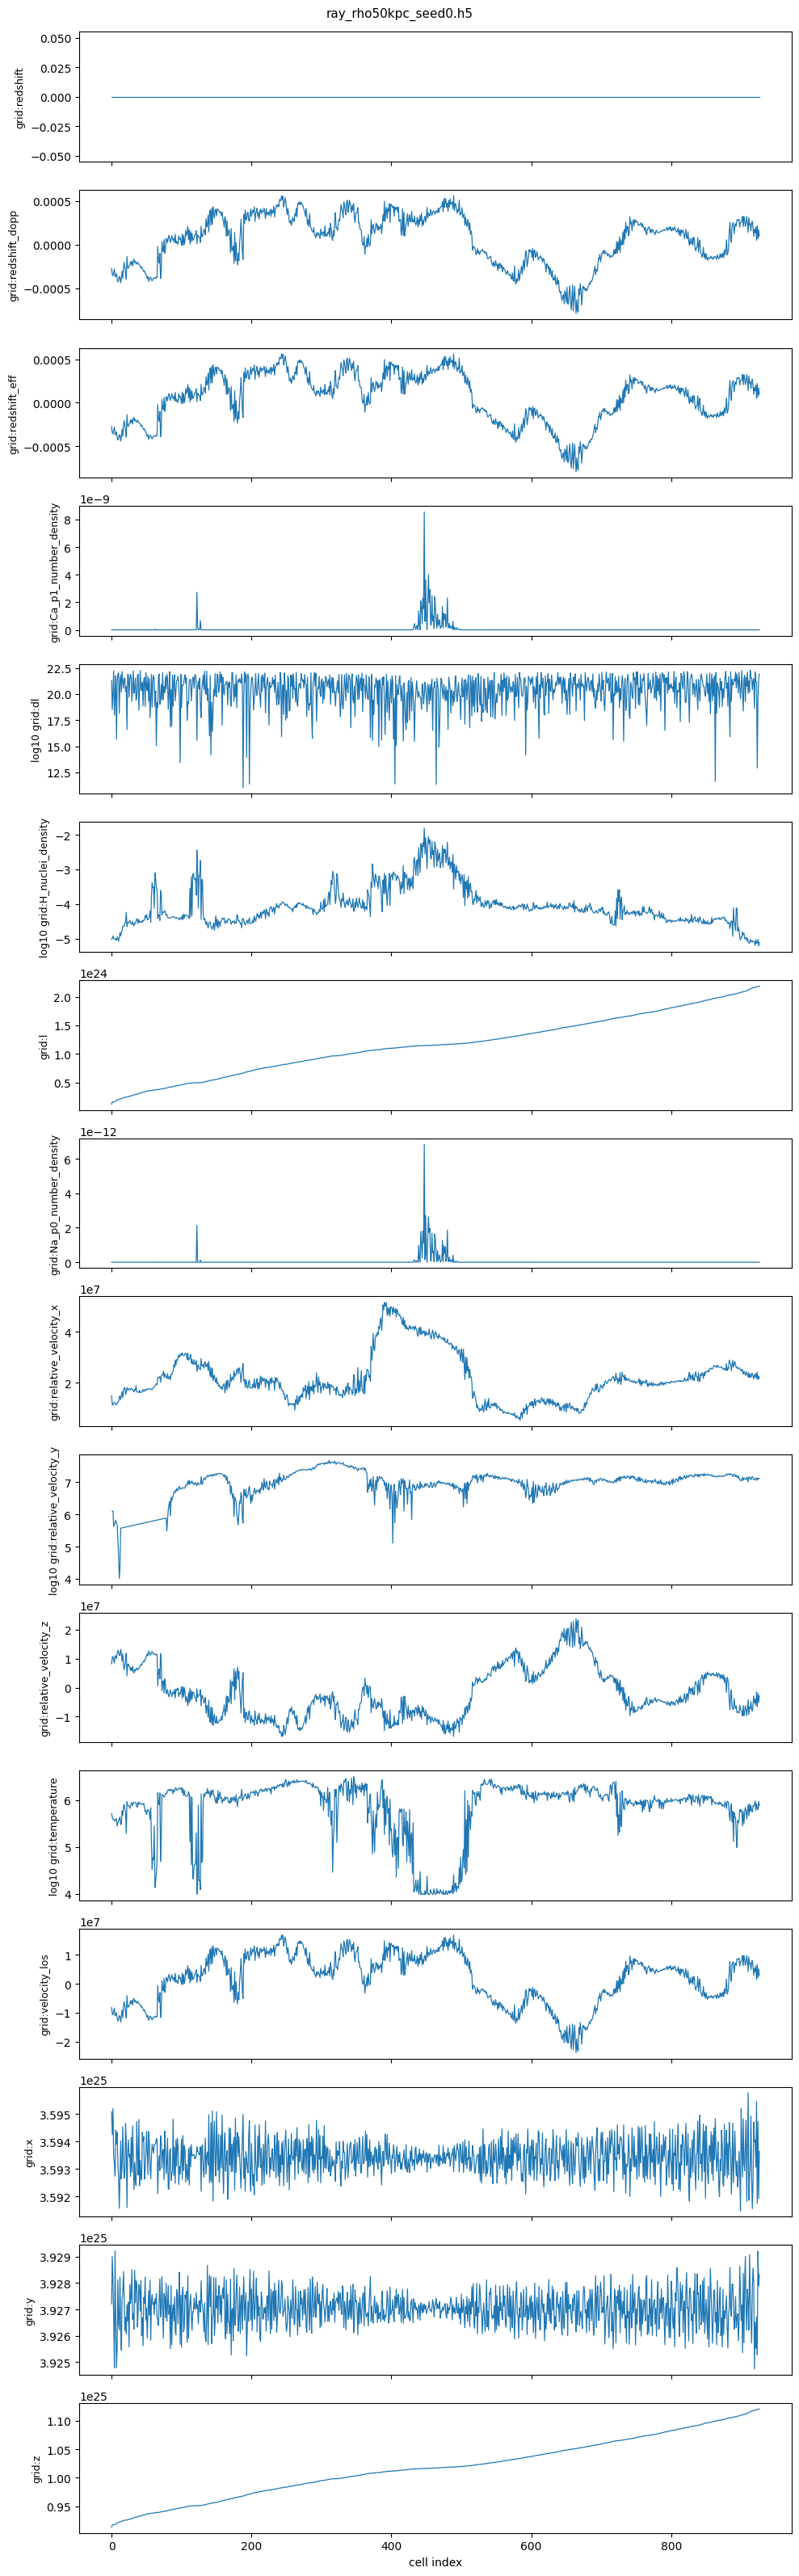

In [120]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Compact inspector for Trident ray files (handles /ray or /grid layouts).
- Prints HDF5 tree (one pass).
- Collects every 1-D per-cell array under /ray/** or /grid/**.
- Plots all series vs. cell index (paged), including redshift, redshift_dopp, redshift_eff.
- Optional spectra zoom panel if /spectrum exists.

Set BUNDLE and INCLUDE_FTYPES as needed.
"""

import os, h5py, numpy as np, matplotlib.pyplot as plt

# ------------------------ CONFIG ------------------------
BUNDLE = "/Users/wavefunction/ASU Dropbox/Tanmay Singh/TNG-MW/plots/spectra/ray_rho50kpc_seed0.h5"
INCLUDE_FTYPES = ["gas"]      # only applies to the /ray/fields tree; ignored for /grid
PAGE_SIZE = 24
SAVE_DIR = None               # e.g. "/tmp"; None => show()
PLOT_SPECTRA = False
Z_SYS = 0.0
LINE_CENTERS_A = {
    "Na I D2": 5889.95095,
    "Na I D1": 5895.92424,
    "Ca II K": 3933.663,
    "Ca II H": 3968.469,
}
LAM_HW_A = 3.0
VEL_HW_KMS = 500.0
# --------------------------------------------------------

def print_h5_tree(path):
    with h5py.File(path, "r") as f:
        def visit(name, obj):
            k = "G" if isinstance(obj, h5py.Group) else "D"
            line = f"[{k}] /{name}"
            if isinstance(obj, h5py.Dataset):
                line += f"  shape={obj.shape} dtype={obj.dtype}"
            print(line)
        f.visititems(visit)

def _is_numeric(ds: h5py.Dataset) -> bool:
    try:
        return np.issubdtype(ds.dtype, np.number)
    except Exception:
        return False

def _dataset_unit(ds: h5py.Dataset) -> str:
    u = ds.attrs.get("unit", "")
    return u.decode() if isinstance(u, (bytes, bytearray)) else str(u)

def _find_ncells_group(g: h5py.Group) -> int:
    # Prefer explicit pathlength hints if present
    for key in ("dl_cm", "dl", "l"):
        if key in g and isinstance(g[key], h5py.Dataset) and g[key].ndim == 1:
            return int(g[key].shape[0])
    # Fallback: first 1-D numeric dataset in this group (or subgroups)
    for name, obj in g.items():
        if isinstance(obj, h5py.Dataset) and obj.ndim == 1 and _is_numeric(obj):
            return int(obj.shape[0])
    # probe one level down
    for name, obj in g.items():
        if isinstance(obj, h5py.Group):
            for subname, ds in obj.items():
                if isinstance(ds, h5py.Dataset) and ds.ndim == 1 and _is_numeric(ds):
                    return int(ds.shape[0])
    raise RuntimeError("Could not infer n_cells for group")

def _detect_layout(f: h5py.File):
    """
    Returns ('ray', group) if /ray exists, else ('grid', group) if /grid exists.
    Raises if neither exists.
    """
    if "ray" in f:
        return "ray", f["ray"]
    if "grid" in f:
        return "grid", f["grid"]
    raise RuntimeError("Unsupported file: neither '/ray' nor '/grid' present.")

def collect_series(bundle_path, include_ftypes=None, include_convenience=True):
    """
    Returns (series_list, n_cells, layout), where series_list contains dicts:
      {'label','data','unit','path'}
    Works for both /ray and /grid files.
    """
    out = []
    with h5py.File(bundle_path, "r") as f:
        layout, gtop = _detect_layout(f)
        n = _find_ncells_group(gtop)

        if layout == "ray":
            # (A) datasets directly under /ray (convenience)
            if include_convenience:
                for k, obj in gtop.items():
                    if isinstance(obj, h5py.Dataset) and obj.ndim == 1 and _is_numeric(obj) and obj.shape[0] == n:
                        out.append({
                            "label": k,
                            "data": np.array(obj, float),
                            "unit": _dataset_unit(obj),
                            "path": f"/ray/{k}"
                        })
            # (B) fields under /ray/fields/<ftype>/<name>
            if "fields" in gtop:
                g_fields = gtop["fields"]
                for ftype in g_fields.keys():
                    if include_ftypes and ftype not in include_ftypes:
                        continue
                    for name, ds in g_fields[ftype].items():
                        if isinstance(ds, h5py.Dataset) and ds.ndim == 1 and _is_numeric(ds) and ds.shape[0] == n:
                            out.append({
                                "label": f"{ftype}:{name}",
                                "data": np.array(ds, float),
                                "unit": _dataset_unit(ds),
                                "path": f"/ray/fields/{ftype}/{name}"
                            })

        elif layout == "grid":
            # Everything is directly under /grid as 1-D arrays
            for name, ds in gtop.items():
                if isinstance(ds, h5py.Dataset) and ds.ndim == 1 and _is_numeric(ds) and ds.shape[0] == n:
                    out.append({
                        "label": f"grid:{name}",
                        "data": np.array(ds, float),
                        "unit": _dataset_unit(ds),
                        "path": f"/grid/{name}"
                    })

    # sort: redshift triplet first if present (works for both layouts)
    priority = {
        "gas:redshift": 0, "gas:redshift_dopp": 1, "gas:redshift_eff": 2,
        "grid:redshift": 0, "grid:redshift_dopp": 1, "grid:redshift_eff": 2,
    }
    out.sort(key=lambda d: (priority.get(d["label"], 99), d["label"].lower()))
    return out, n, layout

def _logify(label, unit, y):
    y = np.asarray(y, float)
    if label.endswith(":redshift") or label.endswith(":redshift_dopp") or label.endswith(":redshift_eff"):
        return y, False
    m = (y > 0) & np.isfinite(y)
    if m.sum() < 0.8 * y.size:
        return y, False
    dyn = (np.nanmax(y[m]) / max(np.nanmin(y[m]), 1e-300)) if m.any() else 1.0
    keys = ("density", "rho", "cm", "dl", "tau", "nhi", "siii", "cii")
    if dyn > 50 or any(k in label.lower() for k in keys) or any(k in str(unit).lower() for k in keys):
        z = np.full_like(y, np.nan, float); z[m] = np.log10(y[m]); return z, True
    return y, False

def plot_all_series(series, bundle_name="", page_size=24, save_dir=None):
    if not series:
        print("[WARN] no per-cell arrays found"); return
    for i0 in range(0, len(series), page_size):
        chunk = series[i0:i0+page_size]
        n = len(chunk)
        fig_h = max(2.0*n, 6.0)
        fig, axes = plt.subplots(n, 1, figsize=(10, fig_h), sharex=True)
        if n == 1: axes = [axes]
        for ax, ent in zip(axes, chunk):
            y = ent["data"]
            yplot, islog = _logify(ent["label"], ent["unit"], y)
            m = np.isfinite(yplot)
            ax.plot(np.arange(y.size)[m], yplot[m], lw=0.9)
            yl = ent["label"] + (f" [{ent['unit']}]" if ent["unit"] else "")
            if islog: yl = "log10 " + yl
            ax.set_ylabel(yl, fontsize=9)
        axes[-1].set_xlabel("cell index")
        fig.suptitle(bundle_name, fontsize=11, y=0.995)
        fig.tight_layout()
        if save_dir:
            os.makedirs(save_dir, exist_ok=True)
            out = os.path.join(save_dir, f"ray_series_{i0:04d}-{i0+n-1:04d}.png")
            fig.savefig(out, dpi=160); plt.close(fig); print("[saved]", out)
        else:
            plt.show()

def plot_spectra_zoom(bundle_path, line_centers_A, z_sys=0.0, lam_hw=3.0, vel_hw=500.0, save_dir=None):
    if not h5py.is_hdf5(bundle_path):
        print("[WARN] not an HDF5 file; skip spectra"); return
    with h5py.File(bundle_path, "r") as f:
        if "spectrum" not in f:
            print("[INFO] no /spectrum group in this file; skip spectra"); return
        if "raw" not in f["spectrum"] or "lsf" not in f["spectrum"]:
            print("[INFO] /spectrum present but missing raw/lsf; skip spectra"); return
        lam_raw = np.asarray(f["spectrum/raw/lambda_A"][:], float)
        flx_raw = np.asarray(f["spectrum/raw/flux"][:], float)
        lam     = np.asarray(f["spectrum/lsf/lambda_A"][:], float)
        flx     = np.asarray(f["spectrum/lsf/flux"][:], float)

    C = 299792.458
    cols = len(line_centers_A)
    fig, axes = plt.subplots(2, cols, figsize=(4.8*cols, 7.2), sharey='row')
    if cols == 1: axes = np.array([[axes[0]], [axes[1]]])
    for j, (name, lam0) in enumerate(line_centers_A.items()):
        lam_c = lam0*(1+z_sys)
        m_r = (lam_raw > lam_c - lam_hw) & (lam_raw < lam_c + lam_hw)
        m_l = (lam     > lam_c - lam_hw) & (lam     < lam_c + lam_hw)
        axw = axes[0, j]
        if m_r.any(): axw.plot(lam_raw[m_r], flx_raw[m_r], lw=1.2, label="raw")
        if m_l.any(): axw.plot(lam[m_l],     flx[m_l],     lw=1.6, label="LSF")
        axw.axvline(lam_c, ls="--", lw=0.8, c="k")
        axw.set_xlim(lam_c - lam_hw, lam_c + lam_hw)
        if j == 0: axw.set_ylabel("Norm. flux")
        axw.set_title(f"{name}  (λ₀={lam0:.3f} Å)")
        axv = axes[1, j]
        v_r = C*((lam_raw[m_r]/(1+z_sys))/lam0 - 1.0) if m_r.any() else np.array([])
        v_l = C*((lam[m_l]/(1+z_sys))/lam0 - 1.0)     if m_l.any() else np.array([])
        if v_r.size: axv.plot(v_r, flx_raw[m_r], lw=1.2, label="raw")
        if v_l.size: axv.plot(v_l, flx[m_l],     lw=1.6, label="LSF")
        axv.axvline(0.0, ls="--", lw=0.8, c="k")
        axv.set_xlim(-VEL_HW_KMS, VEL_HW_KMS)
        axv.set_xlabel("v [km s$^{-1}$]")
        if j == 0: axv.set_ylabel("Norm. flux")
        if j == 0:
            axw.legend(frameon=False); axv.legend(frameon=False)
    fig.tight_layout()
    if save_dir:
        os.makedirs(save_dir, exist_ok=True)
        out = os.path.join(save_dir, "spectra_zoom.png")
        fig.savefig(out, dpi=160); plt.close(fig); print("[saved]", out)
    else:
        plt.show()

if __name__ == "__main__":
    print("=== HDF5 TREE ===")
    print_h5_tree(BUNDLE)

    series, n_cells, layout = collect_series(BUNDLE, include_ftypes=INCLUDE_FTYPES, include_convenience=True)
    print(f"\nLayout: {layout} ; n_cells={n_cells} ; series={len(series)}")
    for s in series:
        print(f" - {s['path']}  (unit='{s['unit']}', N={s['data'].size})")

    print("\n=== Plotting per-cell series ===")
    plot_all_series(series, bundle_name=os.path.basename(BUNDLE), page_size=PAGE_SIZE, save_dir=SAVE_DIR)

    if PLOT_SPECTRA:
        print("\n=== Plotting zoomed spectra ===")
        plot_spectra_zoom(
            BUNDLE,
            line_centers_A=LINE_CENTERS_A,
            z_sys=Z_SYS,
            lam_hw=LAM_HW_A,
            vel_hw=VEL_HW_KMS,
            save_dir=SAVE_DIR
        )

{20.0: {'theta': np.float64(4.218710134820579),
  'N': 453724055649.5685,
  'rayfile': '/Users/wavefunction/ASU Dropbox/Tanmay Singh/TNG-MW/plots/spectra/ray_ref_rho20kpc_th241.h5',
  'dxdy': (np.float64(-6.41997176734649), np.float64(-11.930306645449164))},
 50.0: {'theta': np.float64(1.1918105463618422),
  'N': 417491381095.9368,
  'rayfile': '/Users/wavefunction/ASU Dropbox/Tanmay Singh/TNG-MW/plots/spectra/ray_ref_rho50kpc_th68.h5',
  'dxdy': (np.float64(12.531167009660075), np.float64(31.466592472030516))},
 100.0: {'theta': np.float64(0.057346532565527575),
  'N': 26517944642.59387,
  'rayfile': '/Users/wavefunction/ASU Dropbox/Tanmay Singh/TNG-MW/plots/spectra/ray_ref_rho100kpc_th3.h5',
  'dxdy': (np.float64(67.62863561623004), np.float64(3.8825247438416013))}}

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Na I D + Ca II H&K:
- Three rays at impact parameters 20/50/100 kpc
    • 20 kpc: random position angle (reproducible by SEED)
    • 50/100 kpc: use user-specified start/end offsets (dx, dy) in code_length
- Spectra with two zoomed 2×2 figures per ray:
    (1) wavelength space (±3 Å around line center)
    (2) velocity space (±500 km/s around systemic)
- Ion-weighted and unweighted LOS-velocity projection maps with pierce points
"""

import numpy as np, yt, trident, matplotlib.pyplot as plt, h5py, os
from pathlib import Path
from src.tngmw.config import RAW, PLOTS

# ------------------------------------------------------------------
# Config
# ------------------------------------------------------------------
SEED = 1  # reproducible randomness for the 20 kpc sightline only
rng  = np.random.default_rng(SEED)

CUTOUT = RAW / "subhalo_432106_cutout_full.hdf5"
OUTDIR = (PLOTS / "spectra"); OUTDIR.mkdir(parents=True, exist_ok=True)

# Central wavelengths (vacuum/air distinction is negligible at this level for plotting)
LINE_INFO = [
    ("Na I 5890", "Na I D2", 5889.95095),
    ("Na I 5896", "Na I D1", 5895.92424),
    ("Ca II 3934", "Ca II K", 3933.66300),
    ("Ca II 3968", "Ca II H", 3968.46900),
]
LINE_NAMES_TRIDENT = [li[0] for li in LINE_INFO]
LAM0 = {li[0]: li[2] for li in LINE_INFO}  # map Trident name -> λ0 [Å]

# plot windows
WAVE_HALF_A = 3.0
VEL_HALF_KMS = 500.0
C_KMS = 299_792.458

# sightline geometry
radii_kpc = [20.0, 50.0, 100.0]
Lz_kpc = 350.0  # half-path length

# ------------------------------------------------------------------
# Load dataset, add fields
# ------------------------------------------------------------------
ds = yt.load(CUTOUT)
trident.add_ion_fields(ds, ions=["Na I", "Ca II"])

# IMPORTANT: pos_x, pos_y, pos_z must already be defined (ckpc/h, i.e. code_length here)
# e.g. center = ds.arr([pos_x, pos_y, pos_z], "code_length")
center = ds.arr([pos_x, pos_y, pos_z], "code_length")

ckpc_to_cl = ds.quan(1.0, "kpc").to("code_length").value
dz = Lz_kpc * ckpc_to_cl

# ------------------------------------------------------------------
# Fixed offsets for r=50,100 kpc (provided; already in code_length units)
# ------------------------------------------------------------------
# Keys are radii in kpc; values are (dx_cl, dy_cl) in code_length units
FIXED_OFFSETS = {
    50.0:  (np.float64(12.531167009660075), np.float64(31.466592472030516)),
    100.0: (np.float64(67.62863561623004),  np.float64(3.8825247438416013)),
}
FIXED_THETAS_DEG = {
    50.0:  float(np.degrees(np.float64(1.1918105463618422))),
    100.0: float(np.degrees(np.float64(0.057346532565527575))),
}

# ------------------------------------------------------------------
# Helpers
# ------------------------------------------------------------------
def get_offsets_for_radius(r_kpc: float, theta_rand: float | None = None):
    """
    Return (dx_cl, dy_cl) in code_length for the requested impact parameter.
    For 50/100 kpc: use fixed offsets provided by the user.
    For others (e.g. 20 kpc): use theta_rand to compute offsets from r_kpc.
    """
    if r_kpc in FIXED_OFFSETS:
        return FIXED_OFFSETS[r_kpc]
    if theta_rand is None:
        raise ValueError("theta_rand must be provided for radii without fixed offsets")
    dx = r_kpc * np.cos(theta_rand) * ckpc_to_cl
    dy = r_kpc * np.sin(theta_rand) * ckpc_to_cl
    return dx, dy

def endpoints_from_offsets(c, dx_cl, dy_cl, dz_cl):
    p0 = c + ds.arr([dx_cl, dy_cl, -dz_cl], "code_length")
    p1 = c + ds.arr([dx_cl, dy_cl,  dz_cl], "code_length")
    return p0, p1

def make_zoom_figs(tag, lam, flux):
    """Produce two 2×2 figures: wavelength-zoom and velocity-zoom."""
    # Build per-line slices
    wave_panels = []
    vel_panels  = []
    for trident_name, pretty, lam0 in LINE_INFO:
        # wavelength mask
        m = (lam >= lam0 - WAVE_HALF_A) & (lam <= lam0 + WAVE_HALF_A)
        lw, fw = lam[m], flux[m]

        # velocity transform and mask (centered at lam0)
        v = C_KMS * (lam/lam0 - 1.0)
        mv = (v >= -VEL_HALF_KMS) & (v <= +VEL_HALF_KMS)
        lv, fv = v[mv], flux[mv]

        wave_panels.append((pretty, lam0, lw, fw))
        vel_panels.append((pretty, lam0, lv, fv))

    # --- wavelength zooms (2×2) ---
    fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharey=True)
    axes = axes.ravel()
    for ax, (pretty, lam0, lw, fw) in zip(axes, wave_panels):
        ax.plot(lw, fw, lw=0.9)
        ax.axvline(lam0, ls="--", lw=0.8)
        ax.set_xlim(lam0 - WAVE_HALF_A, lam0 + WAVE_HALF_A)
        ax.set_title(pretty)
        ax.set_xlabel("Wavelength [Å]")
        ax.grid(alpha=0.3)
    axes[0].set_ylabel("Normalized Flux")
    axes[2].set_ylabel("Normalized Flux")
    fig.tight_layout()
    fig.savefig(OUTDIR / f"{tag}_zoom_wavelength.png", dpi=160)
    plt.close(fig)

    # --- velocity zooms (2×2) ---
    fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharey=True)
    axes = axes.ravel()
    for ax, (pretty, lam0, lv, fv) in zip(axes, vel_panels):
        ax.plot(lv, fv, lw=0.9)
        ax.axvline(0.0, ls="--", lw=0.8)
        ax.set_xlim(-VEL_HALF_KMS, +VEL_HALF_KMS)
        ax.set_title(pretty)
        ax.set_xlabel("Velocity [km s$^{-1}$]")
        ax.grid(alpha=0.3)
    axes[0].set_ylabel("Normalized Flux")
    axes[2].set_ylabel("Normalized Flux")
    fig.tight_layout()
    fig.savefig(OUTDIR / f"{tag}_zoom_velocity.png", dpi=160)
    plt.close(fig)

# ------------------------------------------------------------------
# Spectra per ray + zoom plots
#   - 20 kpc uses random PA;
#   - 50/100 kpc use fixed (dx, dy) in code_length from the user
# ------------------------------------------------------------------
# store the pierce-point offsets actually used for later annotations
used_offsets = {}

for r in radii_kpc:
    if r in FIXED_OFFSETS:
        dx_cl, dy_cl = get_offsets_for_radius(r, theta_rand=None)
        theta_used = FIXED_THETAS_DEG[r]
        tag = f"rho{int(r)}kpc_fixed"
    else:
        theta = rng.uniform(0.0, 2.0*np.pi)
        dx_cl, dy_cl = get_offsets_for_radius(r, theta_rand=theta)
        theta_used = np.degrees(theta)
        tag = f"rho{int(r)}kpc_seed{SEED}"

    used_offsets[r] = (dx_cl, dy_cl)

    p0, p1 = endpoints_from_offsets(center, dx_cl, dy_cl, dz)
    rayfile = OUTDIR / f"ray_{tag}.h5"

    # Build ray and write to HDF5
    _ = trident.make_simple_ray(
        ds,
        start_position=p0, end_position=p1,
        data_filename=str(rayfile),
        lines=LINE_NAMES_TRIDENT,
        ftype="gas"
    )

    # Rewrite redshift fields inside the HDF5 file: Δz=z_eff−z; set z=0
    with h5py.File(rayfile, "r+") as f:
        if "grid" not in f:
            raise RuntimeError(f"{rayfile} has no /grid group")
        g = f["grid"]
        if ("redshift" in g) and ("redshift_eff" in g):
            z     = g["redshift"][:]
            z_eff = g["redshift_eff"][:]
            g["redshift_eff"][:] = z_eff - z   # Δz
            g["redshift"][:]     = 0.0         # set z = 0

        # Report integrated columns (Na I, Ca II)
        if ("Na_p0_number_density" in g) and ("dl" in g):
            N_NaI  = float(np.nansum(g["Na_p0_number_density"][:] * g["dl"][:]))
        else:
            N_NaI = np.nan
        if ("Ca_p1_number_density" in g) and ("dl" in g):
            N_CaII = float(np.nansum(g["Ca_p1_number_density"][:] * g["dl"][:]))
        else:
            N_CaII = np.nan

    print(f"[r={r:5.1f} kpc | θ={theta_used:6.2f}°]  "
          f"N(Na I)={N_NaI:.3e} cm^-2  N(Ca II)={N_CaII:.3e} cm^-2  -> {rayfile.name}")

    # Reload as yt dataset and make spectrum
    ray_ds = yt.load(str(rayfile))
    sg = trident.SpectrumGenerator(lambda_min=3500.0, lambda_max=6000.0, dlambda=0.01)
    sg.make_spectrum(ray_ds, lines=LINE_NAMES_TRIDENT)
    lam = np.asarray(sg.lambda_field); flux = np.asarray(sg.flux_field)
    make_zoom_figs(tag, lam, flux)

# ------------------------------------------------------------------
# Ion-weighted LOS-velocity projections (mean v_los) and unweighted SPH view
# ------------------------------------------------------------------
vel_field = ("gas", "velocity_z")   # default units: cm/s

fields = {
    "Na I": ("gas", "Na_p0_number_density"),
    "Ca II": ("gas", "Ca_p1_number_density"),
    "Gas":  ("gas", "density"),
}

for name, ion_ndens in fields.items():
    p = yt.ProjectionPlot(
        ds, "z", vel_field,
        center=center, width=(250.0, "kpc"),
        weight_field=ion_ndens  # ⟨v_z⟩ weighted by ion density or gas density
    )
    p.set_unit(vel_field, "km/s")
    p.set_cmap(vel_field, "RdBu")
    p.set_zlim(vel_field, -200.0, 200.0)

    # pierce points from used_offsets
    for r in radii_kpc:
        dx_cl, dy_cl = used_offsets[r]
        mark3d = [center[0].value + dx_cl, center[1].value + dy_cl, center[2].value]
        p.annotate_marker(
            mark3d,
            coord_system="data",
            marker="x",
            plot_args={"color": "black", "s": 64, "linewidths": 1.4}
        )
        p.annotate_text(
            mark3d, f"{int(r)} kpc",
            coord_system="data",
            text_args={"color": "black", "fontsize": 12, "weight": "bold"}
        )

    p.annotate_title(f"{name} weighted ⟨v_los⟩ (axis=z)")
    p.save(OUTDIR / f"proj_{name.replace(' ','_')}_vlos_weighted_seed{SEED}.png")

# Unweighted SPH-style velocity projection (mean per pixel without ion weighting)
def vlos_projection(axis="z", width_kpc=250.0, vabs_kms=400.0, cmap="RdBu"):
    vel = ("gas", f"velocity_{axis}")
    p = yt.ParticleProjectionPlot(
        ds, axis, vel,
        center=center, width=(width_kpc, "kpc"),
        weight_field=None,
    )
    p.set_unit(vel, "km/s")
    p.set_cmap(vel, cmap)
    p.set_zlim(vel, -vabs_kms, +vabs_kms)

    for r in radii_kpc:
        dx_cl, dy_cl = used_offsets[r]
        mark3d = [center[0].value + dx_cl, center[1].value + dy_cl, center[2].value]
        p.annotate_marker(
            mark3d, coord_system="data", marker="x",
            plot_args={"color": "black", "s": 64, "linewidths": 1.4},
        )
        p.annotate_text(
            mark3d, f"{int(r)} kpc",
            coord_system="data",
            text_args={"color": "black", "fontsize": 12, "weight": "bold"},
        )

    p.annotate_title(rf"Unweighted LOS Velocity (v$_{{\rm {axis}}}$)")
    return p

proj = vlos_projection(axis="z", width_kpc=250.0, vabs_kms=400.0)
proj.save(OUTDIR / f"proj_vlos_unweighted_z_seed{SEED}.png")

yt : [INFO     ] 2025-11-09 12:39:36,278 Calculating time from 1.000e+00 to be 4.356e+17 seconds
yt : [INFO     ] 2025-11-09 12:39:36,306 Parameters: current_time              = 4.355810528213311e+17 s
yt : [INFO     ] 2025-11-09 12:39:36,307 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-11-09 12:39:36,307 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-11-09 12:39:36,307 Parameters: domain_right_edge         = [35000. 35000. 35000.]
yt : [INFO     ] 2025-11-09 12:39:36,308 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-11-09 12:39:36,309 Parameters: current_redshift          = 2.220446049250313e-16
yt : [INFO     ] 2025-11-09 12:39:36,309 Parameters: omega_lambda              = 0.6911
yt : [INFO     ] 2025-11-09 12:39:36,311 Parameters: omega_matter              = 0.3089
yt : [INFO     ] 2025-11-09 12:39:36,311 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-11-09 12:39:36,312 Parameters: hubble_con

[r= 20.0 kpc | θ=184.26°]  N(Na I)=7.949e+10 cm^-2  N(Ca II)=2.754e+14 cm^-2  -> ray_rho20kpc_seed1.h5


Adding line - Ca II 3968 [3968.469000 A]: 100%|██████████| 959/959 [00:00<00:00, 33782.99it/s]
yt : [INFO     ] 2025-11-09 12:39:37,963 Getting segment at z = 2.220446049250313e-16: [0.22586746 0.24625419 0.05655457] unitary to [0.22586746 0.24625419 0.07010257] unitary.
yt : [INFO     ] 2025-11-09 12:39:37,963 Getting subsegment: [0.22586746 0.24625419 0.05655457] unitary to [0.22586746 0.24625419 0.07010257] unitary.
yt : [INFO     ] 2025-11-09 12:39:38,544 Saving field data to yt dataset: /Users/wavefunction/ASU Dropbox/Tanmay Singh/TNG-MW/plots/spectra/ray_rho50kpc_fixed.h5.
yt : [INFO     ] 2025-11-09 12:39:38,555 Parameters: current_time              = 4.355810528213311e+17 s
yt : [INFO     ] 2025-11-09 12:39:38,555 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-11-09 12:39:38,556 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2025-11-09 12:39:38,556 Parameters: domain_right_edge         = [35000. 35000. 35000.] code_length


[r= 50.0 kpc | θ= 68.29°]  N(Na I)=4.175e+11 cm^-2  N(Ca II)=6.197e+14 cm^-2  -> ray_rho50kpc_fixed.h5


Adding line - Ca II 3968 [3968.469000 A]: 100%|██████████| 872/872 [00:00<00:00, 27292.04it/s]
yt : [INFO     ] 2025-11-09 12:39:38,998 Getting segment at z = 2.220446049250313e-16: [0.22744168 0.24546607 0.05655457] unitary to [0.22744168 0.24546607 0.07010257] unitary.
yt : [INFO     ] 2025-11-09 12:39:38,999 Getting subsegment: [0.22744168 0.24546607 0.05655457] unitary to [0.22744168 0.24546607 0.07010257] unitary.
yt : [INFO     ] 2025-11-09 12:39:39,706 Saving field data to yt dataset: /Users/wavefunction/ASU Dropbox/Tanmay Singh/TNG-MW/plots/spectra/ray_rho100kpc_fixed.h5.
yt : [INFO     ] 2025-11-09 12:39:39,718 Parameters: current_time              = 4.355810528213311e+17 s
yt : [INFO     ] 2025-11-09 12:39:39,718 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-11-09 12:39:39,718 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2025-11-09 12:39:39,719 Parameters: domain_right_edge         = [35000. 35000. 35000.] code_length

[r=100.0 kpc | θ=  3.29°]  N(Na I)=2.652e+10 cm^-2  N(Ca II)=4.241e+13 cm^-2  -> ray_rho100kpc_fixed.h5


Adding line - Ca II 3968 [3968.469000 A]: 100%|██████████| 646/646 [00:00<00:00, 46465.12it/s]
yt : [INFO     ] 2025-11-09 12:39:40,061 xlim = 7808.155011 7977.504989
yt : [INFO     ] 2025-11-09 12:39:40,061 ylim = 8502.755011 8672.104989
yt : [INFO     ] 2025-11-09 12:39:40,062 xlim = 7808.155011 7977.504989
yt : [INFO     ] 2025-11-09 12:39:40,062 ylim = 8502.755011 8672.104989
yt : [INFO     ] 2025-11-09 12:39:40,063 Making a fixed resolution buffer of (('gas', 'velocity_z')) 800 by 800
yt : [INFO     ] 2025-11-09 12:39:41,863 Making a fixed resolution buffer of (('gas', 'Na_p0_number_density')) 800 by 800
/var/folders/ng/2lqpk97j4xz4qpsvv8tt4tv80000gn/T/ipykernel_74061/2064079281.py:233: DeprecationWarning: `plot_args` is deprecated. You can now pass arbitrary keyword arguments instead of a dictionary.
Deprecated since yt 4.1
  p.annotate_marker(
yt : [INFO     ] 2025-11-09 12:39:43,676 Saving plot /Users/wavefunction/ASU Dropbox/Tanmay Singh/TNG-MW/plots/spectra/proj_Na_I_vlos_wei

['/Users/wavefunction/ASU Dropbox/Tanmay Singh/TNG-MW/plots/spectra/proj_vlos_unweighted_z_seed1.png']

In [241]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Publication-quality composite with requested refinements.
"""

from pathlib import Path
import re
import numpy as np
import yt, trident, h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# ------------------------- Paths -------------------------
from src.tngmw.config import RAW, PLOTS
CUTOUT = RAW / "subhalo_432106_cutout_full.hdf5"
OUTDIR = (PLOTS / "spectra"); OUTDIR.mkdir(parents=True, exist_ok=True)

# ------------------------- Style -------------------------
mpl.rcParams.update({
    "figure.dpi": 150, "savefig.dpi": 320,
    "text.usetex": True,
    "font.family": "Times New Roman",
    "font.size": 14,
    "axes.titlesize": 14, "axes.labelsize": 16,
    "xtick.labelsize": 13, "ytick.labelsize": 13, "legend.fontsize": 13,
    "xtick.direction": "in", "ytick.direction": "in",
    "axes.linewidth": 1.4,
})

# ------------------------- Constants & lines -------------------------
C_KMS = 299_792.458
V_MIN, V_MAX = -250.0, 250.0                 # km/s (asymmetric)
V_ABS = max(-V_MIN, V_MAX)                   # = 300 for windowing

# (Trident label, pretty label, rest wavelength [Å])
LINES = [
    ("Ca II 3934", "Ca II K", 3933.66300),
    ("Ca II 3968", "Ca II H", 3968.46900),
    ("Na I 5890",  "Na I D2", 5889.95095),
    ("Na I 5896",  "Na I D1", 5895.92424),
]
LAM0 = {lab: lam0 for (lab, _, lam0) in LINES}
PANEL_ORDER = [
    ("Ca II 3934", "Ca II K"),
    ("Ca II 3968", "Ca II H"),
    ("Na I 5890",  "Na I D2"),
    ("Na I 5896",  "Na I D1"),
]

def pretty_to_mathrm(txt: str) -> str:
    return r"\mathrm{" + txt.replace(" ", r"\ ") + "}"

# radii and distinct colors/markers for sightlines
radii_kpc = [20.0, 50.0, 100.0]
RCOL = {20.0: "#f8e91f", 50.0: "#e312bd", 100.0: "#2ca02c"}
RMRK = {20.0: "x", 50.0: "s", 100.0: "p"}
RIDX = {20.0: 1, 50.0: 2, 100.0: 3}

# Labels
ANN_TEXT = {
    r: rf"\textbf{{#{RIDX[r]}}}\\${int(r)}\,\mathrm{{kpc}}$"
    for r in radii_kpc
}
ANN_TEXT = {r: rf"\textbf{{\#{RIDX[r]}}}\,,${int(r)}\,\mathrm{{kpc}}$" for r in radii_kpc}
LEG_TEXT = {r: rf"\#{RIDX[r]}" for r in radii_kpc}

# ------------------------- Load & fields -------------------------
ds = yt.load(CUTOUT)
trident.add_ion_fields(ds, ions=["Na I", "Ca II"])

# pos_x, pos_y, pos_z must exist upstream
center = ds.arr([pos_x, pos_y, pos_z], "code_length")

ckpc_to_cl = ds.quan(1.0, "kpc").to("code_length").value
Lz_kpc = 350.0
dz = Lz_kpc * ckpc_to_cl

# fixed offsets for 50/100 kpc (already code_length)
FIXED_OFFSETS = {
    50.0:  (np.float64(12.531167009660075), np.float64(31.466592472030516)),
    100.0: (np.float64(67.62863561623004),  np.float64(3.8825247438416013)),
}
SEED = 1
rng  = np.random.default_rng(SEED)

def offsets_for_radius(r_kpc, theta=None):
    if r_kpc in FIXED_OFFSETS:
        return FIXED_OFFSETS[r_kpc]
    if theta is None:
        raise ValueError("theta required for non-fixed radius")
    dx = r_kpc * np.cos(theta) * ckpc_to_cl
    dy = r_kpc * np.sin(theta) * ckpc_to_cl
    return dx, dy

def endpoints(center, dx_cl, dy_cl, dz_cl):
    p0 = center + ds.arr([dx_cl, dy_cl, dz_cl], "code_length")
    p1 = center + ds.arr([dx_cl, dy_cl, - dz_cl], "code_length")
    return p0, p1

# ------------------------- Rays -------------------------
rayfiles = {}
pierce_xy_kpc = {}
for r in radii_kpc:
    if r in FIXED_OFFSETS:
        dx_cl, dy_cl = offsets_for_radius(r)
        tag = f"rho{int(r)}kpc_fixed"
    else:
        theta = rng.uniform(0, 2*np.pi)
        dx_cl, dy_cl = offsets_for_radius(r, theta)
        tag = f"rho{int(r)}kpc_seed{SEED}"
    pierce_xy_kpc[r] = (dx_cl/ckpc_to_cl, dy_cl/ckpc_to_cl)

    p0, p1 = endpoints(center, dx_cl, dy_cl, dz)
    rayfile = OUTDIR / f"ray_{tag}.h5"
    rayfiles[r] = rayfile

    _ = trident.make_simple_ray(
        ds, start_position=p0, end_position=p1,
        data_filename=str(rayfile),
        lines=[lab for (lab, _, _) in LINES],
        ftype="gas",
    )

    # center velocities (z_eff := z_eff - z ; z := 0)
    with h5py.File(rayfile, "r+") as f:
        if "grid" in f and ("redshift" in f["grid"]) and ("redshift_eff" in f["grid"]):
            z  = f["grid"]["redshift"][:]
            ze = f["grid"]["redshift_eff"][:]
            f["grid"]["redshift_eff"][:] = ze - z
            f["grid"]["redshift"][:]     = 0.0

# ------------------------- LEFT: density-weighted <v_los> -------------------------
vel_field   = ("gas", "velocity_z")
WFIELD_DENS = ("gas", "density")
WIDTH = (350.0, "kpc")

pmap = yt.ProjectionPlot(
    ds, "z", vel_field, center=center, width=WIDTH, weight_field=WFIELD_DENS
)
pmap.set_unit(vel_field, "km/s")
pmap.set_cmap(vel_field, "RdBu")
pmap.set_zlim(vel_field, -200.0, 200.0)

frb_v     = pmap.frb
v_img     = frb_v[vel_field].in_units("km/s").v
im_handle = pmap.plots[vel_field].image
extent    = im_handle.get_extent()  # (xmin, xmax, ymin, ymax) in kpc

# ------------------------- RIGHT: single-line velocity spectra -------------------------
def single_line_velocity_spectrum(rayfile_path, trident_label, lam0, v_abs=V_ABS):
    ray_ds = yt.load(str(rayfile_path))
    dlam = lam0 * (v_abs / C_KMS)
    lam_min, lam_max = float(lam0 - dlam), float(lam0 + dlam)
    sg = trident.SpectrumGenerator(lambda_min=lam_min, lambda_max=lam_max, dlambda=0.01)
    sg.make_spectrum(ray_ds, lines=[trident_label])
    lam  = np.asarray(sg.lambda_field, float)
    flux = np.asarray(sg.flux_field,   float)
    v = C_KMS * (lam/lam0 - 1.0)
    m = (v >= V_MIN) & (v <= V_MAX)
    return v[m], flux[m]

spectra = {}
for pi, (lab, _pretty) in enumerate(PANEL_ORDER):
    lam0 = LAM0[lab]
    for r in radii_kpc:
        v, f = single_line_velocity_spectrum(rayfiles[r], lab, lam0, v_abs=V_ABS)
        spectra[(pi, r)] = (v, f)

# ------------------------- Figure & grids -------------------------
fig = plt.figure(figsize=(13.6, 6.8))

# Outer grid: 1×2 (space between panels via wspace)
outer = fig.add_gridspec(nrows=1, ncols=2, width_ratios=[1.2, 1.25], wspace=0.12)

# Left panel
left_gs = outer[0, 0].subgridspec(nrows=1, ncols=1)
axL = fig.add_subplot(left_gs[0, 0])
im = axL.imshow(v_img, origin="lower", extent=extent, cmap="RdBu",
                vmin=-200.0, vmax=+200.0, interpolation="bilinear", alpha=1, zorder=1)


MS = {20.0: 11.5, 50.0: 11.5, 100.0: 11.5}      # marker sizes
EDGEW = {"s": 2.0, "D": 2.0}                    # edge widths for filled markers
X_OUTER_EW, X_INNER_EW = 3.2, 2.0               # edge widths for layered 'x'

# sightline markers + semi-transparent boxed labels above markers
for r in radii_kpc:
    xk, yk = pierce_xy_kpc[r]
    mk = RMRK[r]

    if mk == "x":
        # outer black X (slightly larger)
        axL.plot(xk, yk, marker="x", linestyle="None",
                 markersize=MS[r] + 1.8, markeredgewidth=X_OUTER_EW,
                 color="k", zorder=3)
        # inner colored X
        axL.plot(xk, yk, marker="x", linestyle="None",
                 markersize=MS[r], markeredgewidth=X_INNER_EW,
                 color=RCOL[r], zorder=4)
    else:
        # filled markers with black edge
        axL.plot(xk, yk, marker=mk, linestyle="None",
                 markersize=MS[r],
                 markerfacecolor=RCOL[r],
                 markeredgecolor="k",
                 markeredgewidth=EDGEW.get(mk, 2.0),
                 zorder=4)
    axL.annotate(
        ANN_TEXT[r],
        xy=(xk, yk), xycoords="data",
        xytext=(0, 10), textcoords="offset points",
        ha="center", va="bottom", color="black",
        fontsize=12.5,
        bbox=dict(
            boxstyle="round,pad=0.22",
            facecolor="white", edgecolor="black", alpha=0.25, lw=0.7
        ),
        zorder=5
    )

# top-right info boxes
m = re.search(r"subhalo_(\d+)", str(CUTOUT))
sub_id = m.group(1) if m else "432106"
axL.text(0.98, 0.97, rf"\textbf{{TNG50-1}}\;, ID = {sub_id}",
         transform=axL.transAxes, ha="right", va="top", color="black",
         bbox=dict(boxstyle="round,pad=0.28", facecolor="white", edgecolor="0.5", alpha=0.9), zorder=5)
# place it at bottom-right to avoid overlap with pierce-point labels
axL.text(0.98, 0.07, r"$z = 0,\;\log(M_\star/M_\odot)=11.2$",
         transform=axL.transAxes, ha="right", va="top", color="black",
         bbox=dict(boxstyle="round,pad=0.28", facecolor="white", edgecolor="0.5", alpha=0.9), zorder=5)

# Left panel formatting
axL.set_xlabel(r"$x$ [kpc]")
axL.set_ylabel(r"$y$ [kpc]")
axL.minorticks_on()
axL.tick_params(which="both", direction="in", top=True, right=True, length=6)
axL.tick_params(which="minor", length=3)

# Colorbar exactly under left panel
divider = make_axes_locatable(axL)
cax = divider.append_axes("bottom", size="5.5%", pad=0.55)
cb  = fig.colorbar(im, cax=cax, orientation="horizontal")
cb.set_label(r"$\langle v_{\rm los}\rangle$  [km s$^{-1}$]", fontsize=15)
cb.ax.tick_params(direction="in", top=True, bottom=True, length=4, labelsize=13)
cb.ax.minorticks_on()
 
# Right panel: 2×2 grid (touching)
right_gs = outer[0, 1].subgridspec(nrows=2, ncols=2, wspace=0.05, hspace=0.05)
ax_CaK  = fig.add_subplot(right_gs[0, 0])
ax_CaH  = fig.add_subplot(right_gs[0, 1], sharex=ax_CaK, sharey=ax_CaK)
ax_NaD2 = fig.add_subplot(right_gs[1, 0], sharex=ax_CaK)              # own y-scale for Na
ax_NaD1 = fig.add_subplot(right_gs[1, 1], sharex=ax_CaH, sharey=ax_NaD2)
axes = [ax_CaK, ax_CaH, ax_NaD2, ax_NaD1]

# Draw the four spectra
for ax in axes:
    ax.grid(False)
    ax.minorticks_on()
    ax.tick_params(which="both", direction="in", top=True, right=True, length=6, pad=3, labelsize=13)
    ax.tick_params(which="minor", length=3, pad=3)

for pi, ax in enumerate(axes):
    lab, pretty = PANEL_ORDER[pi]
    lam0 = LAM0[lab]
    pretty_math = pretty_to_mathrm(pretty)
    for r in radii_kpc:
        v, f = spectra[(pi, r)]
        lbl = LEG_TEXT[r] if pi == 2 else None  # legend handles on bottom-left (Na D2)
        ax.plot(v, f, lw=1.5, color=RCOL[r], label=lbl)
    ax.axvline(0.0, color="k", ls="--", lw=0.9, zorder=5)
    ax.set_xlim(V_MIN, V_MAX)
    if "Na I" in lab:
        ax.set_ylim(0.75, 1.03)
        ax.set_yticks([0.8, 0.9, 1.0])
    else:
        ax.set_ylim(-0.23, 1.1)
        ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax.text(0.98, 0.05, rf"${pretty_math}\ ({lam0:.0f}\,\AA)$",
            transform=ax.transAxes, ha="right", va="bottom",
            color="#303030",
            fontsize=11,
            bbox=dict(boxstyle="round,pad=0.24", facecolor="white", edgecolor="0.3", alpha=0.85),zorder=4)

# Tick-label visibility rules
ax_CaK.tick_params(labelleft=True);  ax_CaH.tick_params(labelleft=False)
ax_NaD2.tick_params(labelleft=True); ax_NaD1.tick_params(labelleft=False)
ax_CaK.tick_params(labelbottom=False); ax_CaH.tick_params(labelbottom=False)
ax_NaD2.tick_params(labelbottom=True); ax_NaD1.tick_params(labelbottom=True)
for ax in (ax_NaD2, ax_NaD1):
    ax.set_xticks([-200, -100, 0, 100, 200,])

ax_NaD2.text(
    0.93, 0.3, r"$R \rightarrow \infty$",
    transform=ax_NaD2.transAxes,
    ha="right", va="top", color="black",
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.22", facecolor="white", edgecolor="0.6", alpha=0.85),
    zorder=5
)

# Legend on bottom-left (Na D2)
leg = ax_NaD2.legend(
    loc="center right", ncols=1, frameon=True, fancybox=True, framealpha=0.92,
    edgecolor="0.4", facecolor="white", handlelength=1.8, columnspacing=0.8
)
for txt in leg.get_texts():
    txt.set_usetex(True); txt.set_fontsize(13)

# ------------------------- Geometry: match right block height (incl. left colorbar)
# and preserve the right block aspect ratio by uniform x/y scaling -----------------
fig.tight_layout()
fig.canvas.draw()

# Left union bbox: map + its colorbar
bL_map = axL.get_position()
bL_cb  = cax.get_position()
Ly0 = min(bL_map.y0, bL_cb.y0)
Ly1 = max(bL_map.y1, bL_cb.y1)
Lh  = Ly1 - Ly0  # target height

# Right union bbox (current)
b_tl = ax_CaK.get_position();  b_tr = ax_CaH.get_position()
b_bl = ax_NaD2.get_position(); b_br = ax_NaD1.get_position()
Rx0 = min(b_tl.x0, b_bl.x0); Rx1 = max(b_tr.x1, b_br.x1)
Ry0 = min(b_bl.y0, b_br.y0); Ry1 = max(b_tl.y1, b_tr.y1)
Rh  = Ry1 - Ry0
RcX = 0.5 * (Rx0 + Rx1)  # horizontal center of the right block

# Uniform scale to match heights; apply to both x and y to keep aspect ratio
s = Lh / Rh

def _scale_rect(bb, s, RcX, Ry0, Ly0):
    # scale x about the right-block center; scale y about right-block bottom, then anchor to Ly0
    x0 = RcX + s * (bb.x0 - RcX)
    x1 = RcX + s * (bb.x1 - RcX)
    y0 = Ly0 + s * (bb.y0 - Ry0)
    y1 = Ly0 + s * (bb.y1 - Ry0)
    return [x0, y0, x1 - x0, y1 - y0]

for ax in (ax_CaK, ax_CaH, ax_NaD2, ax_NaD1):
    ax.set_position(_scale_rect(ax.get_position(), s, RcX, Ry0, Ly0))

fig.canvas.draw()

# ------------------------- Common axis labels anchored to the UPDATED right block ----
b_tl = ax_CaK.get_position();  b_tr = ax_CaH.get_position()
b_bl = ax_NaD2.get_position(); b_br = ax_NaD1.get_position()
x0 = min(b_tl.x0, b_bl.x0); x1 = max(b_tr.x1, b_br.x1)
y0 = min(b_bl.y0, b_br.y0); y1 = max(b_tl.y1, b_tr.y1)
cx = 0.5 * (x0 + x1); cy = 0.5 * (y0 + y1)

# Remove any previous fig.text calls if needed, then write:
fig.text(cx, y0 - 0.028, r"Velocity  [km s$^{-1}$]", ha="center", va="top", fontsize=18)
fig.text(x0 - 0.030, cy, "Normalized Flux", rotation="vertical",
         ha="right", va="center", fontsize=18)

# ------------------------- Save ------------------------------------------------------
outfile = OUTDIR / "fig_kinematics_plus_spectra_pubquality.png"
fig.savefig(outfile, bbox_inches="tight")
plt.close(fig)
print(f"[saved] {outfile}")

yt : [INFO     ] 2025-11-09 15:59:58,675 Calculating time from 1.000e+00 to be 4.356e+17 seconds
yt : [INFO     ] 2025-11-09 15:59:58,695 Parameters: current_time              = 4.355810528213311e+17 s
yt : [INFO     ] 2025-11-09 15:59:58,696 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-11-09 15:59:58,696 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-11-09 15:59:58,697 Parameters: domain_right_edge         = [35000. 35000. 35000.]
yt : [INFO     ] 2025-11-09 15:59:58,697 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-11-09 15:59:58,697 Parameters: current_redshift          = 2.220446049250313e-16
yt : [INFO     ] 2025-11-09 15:59:58,697 Parameters: omega_lambda              = 0.6911
yt : [INFO     ] 2025-11-09 15:59:58,698 Parameters: omega_matter              = 0.3089
yt : [INFO     ] 2025-11-09 15:59:58,698 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-11-09 15:59:58,698 Parameters: hubble_con

[saved] /Users/wavefunction/ASU Dropbox/Tanmay Singh/TNG-MW/plots/spectra/fig_kinematics_plus_spectra_pubquality.png
